<a href="https://colab.research.google.com/github/GiilDe/AI1/blob/master/Optimisation_Project_edge_of_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/locuslab/edge-of-stability

Cloning into 'edge-of-stability'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 100 (delta 44), reused 85 (delta 29), pack-reused 0
Receiving objects: 100% (100/100), 262.40 KiB | 20.18 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
import os
os.environ["DATASETS"] = "/content/edge_of_stability/DATASETS"
os.environ["RESULTS"] = "/content/edge_of_stability/RESULTS_wd"

In [ ]:
dataset = "cifar10-5k"
arch = "fc-tanh"
loss = "mse"
gd_lr = 0.01
gd_eig_freq = 100

In [ ]:
!python /content/edge-of-stability/src/gd.py \
cifar10-5k \
fc-tanh  \
$loss  \
0.01 \
100000 \
--acc_goal 0.99 \
--neigs 2  \
--eig_freq 100

python3: can't open file '/content/edge-of-stability/src/gd.py': [Errno 2] No such file or directory


Text(0.5, 0, 'iteration')

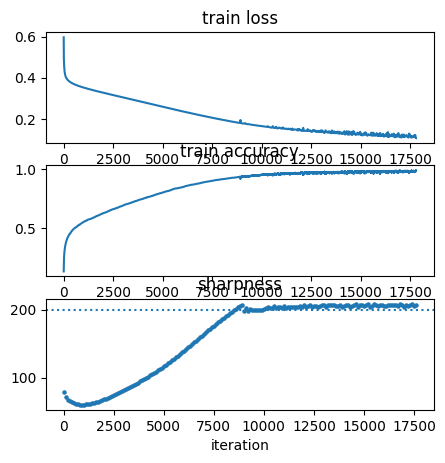

In [ ]:
import torch
import matplotlib.pyplot as plt
from os import environ

gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"

gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0]

plt.figure(figsize=(5, 5), dpi=100)

plt.subplot(3, 1, 1)
plt.plot(gd_train_loss)
plt.title("train loss")

plt.subplot(3, 1, 2)
plt.plot(gd_train_acc)
plt.title("train accuracy")

plt.subplot(3, 1, 3)
plt.scatter(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, s=5)
plt.axhline(2. / gd_lr, linestyle='dotted')
plt.title("sharpness")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

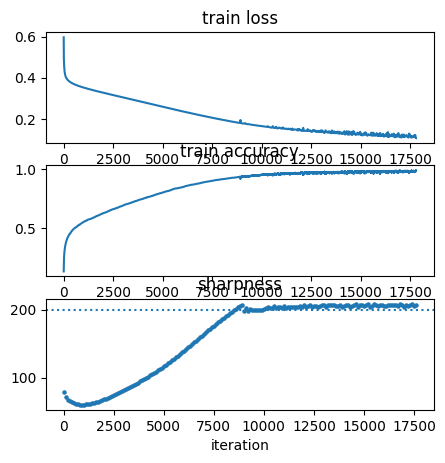

In [ ]:
import torch
import matplotlib.pyplot as plt
from os import environ

gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"

gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0]

plt.figure(figsize=(5, 5), dpi=100)

plt.subplot(3, 1, 1)
plt.plot(gd_train_loss)
plt.title("train loss")

plt.subplot(3, 1, 2)
plt.plot(gd_train_acc)
plt.title("train accuracy")

plt.subplot(3, 1, 3)
plt.scatter(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, s=5)
plt.axhline(2. / gd_lr, linestyle='dotted')
plt.title("sharpness")
plt.xlabel("iteration")